# The Sparks Foundation - Data Science and Business Analytics Internship

Name - Sarang Narayanrao Chandekar

Link - https://internship.thesparksfoundation.info/

Task No.3 - Exploratory Data-Analysis -Retail (Level-Begineer)

**Problem Statement -**

**1. As a business manager, try to find out the week areas where you can work to make more profit.**

**2. What all business problems you can deriveby exploring the data?**

### Data Preparation

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the Dataset
data = pd.read_csv("C:/Users/ASUS/Desktop/SPARK/Exploratory Data Analysis/Exploratory Data Analysis -Retail/SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Checking for the null or NA values and duplicated values to know the quality of data**

In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [25]:
data.duplicated().sum()

17

**We found no null or NA values but data have some duplicated values which we will remove to avoid data inconsistency**

In [31]:
data =data.drop_duplicates()

In [32]:
data.duplicated().sum()

0

**Duplicates were removed now we can proceed further**

In [7]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
data.count().unique()

array([9994], dtype=int64)

In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
# Total Sales And Profit Generated

print("Total Sales: ", round(data['Sales'].sum()))
print("Total Profit: ", round(data['Profit'].sum()))

Total Sales:  2297201
Total Profit:  286397


# Analysis & Visualization

### Reviewing the Total % of Ship Mode use

In [11]:
data['Ship Mode'].value_counts()/data.shape[0]*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

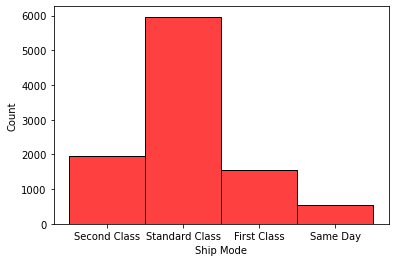

In [12]:
sns.histplot(data['Ship Mode'],color='r')

According to the above plot we can say that, around 60% of total delivery is done by using Standard Shipping Method, whereas it seems that same day delivery has the least % .

In [13]:
data['Category'].value_counts()/data.shape[0]*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Count'>

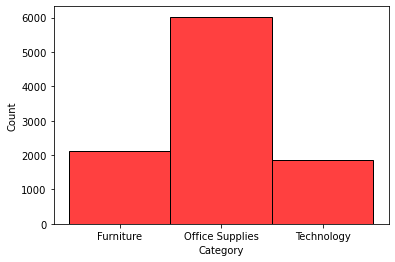

In [14]:
sns.histplot(data['Category'],color='r')

###  The impact on Sales and Profit as per Category

If obsereved we can see that, customers prefer to order or have ordered 60% of Office Supplies which is the highest among the category being technology the lowest at 18%.

<function matplotlib.pyplot.show(close=None, block=None)>

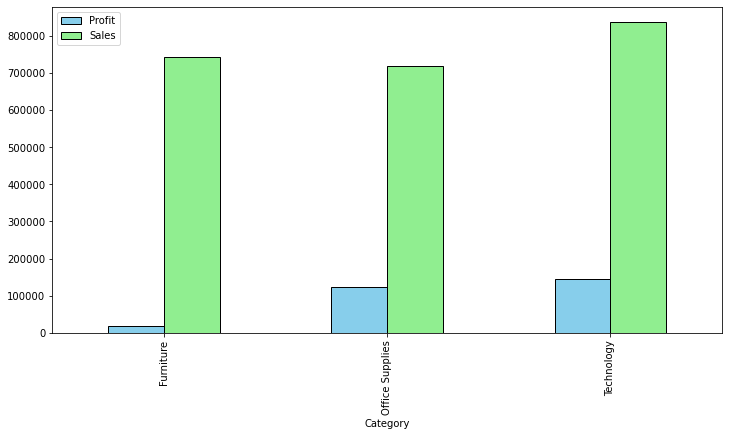

In [15]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(figsize=(12,6),color = ['skyblue','lightgreen'],edgecolor='black')
plt.legend(loc='upper left')
plt.show

**From the above plot we can conclude that:**
1. Even if sales are almost identical of Furniture category and Office Supplies the profit generated by each category differs from each other.
2. The profit generated by Technology is highest and the profit generated by furniture sales is lowest.

In [16]:
data['Sub-Category'].value_counts()/data.shape[0]*100

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

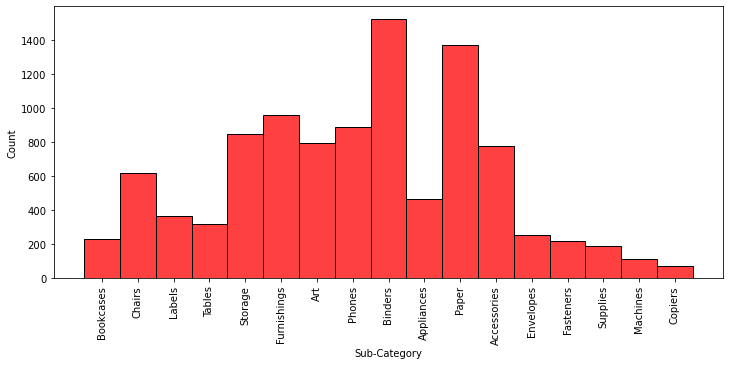

In [17]:
sns.histplot(data['Sub-Category'],color='r')
plt.xticks(rotation =90)
plt.gcf().set_size_inches(12,5)

After plotting the hisplot we can say that, binders are the top selling productscopiers being the least selling item in the list.

Region-wise sales and profit distribution

### Impact on Sales and Profit Region-wise

<function matplotlib.pyplot.show(close=None, block=None)>

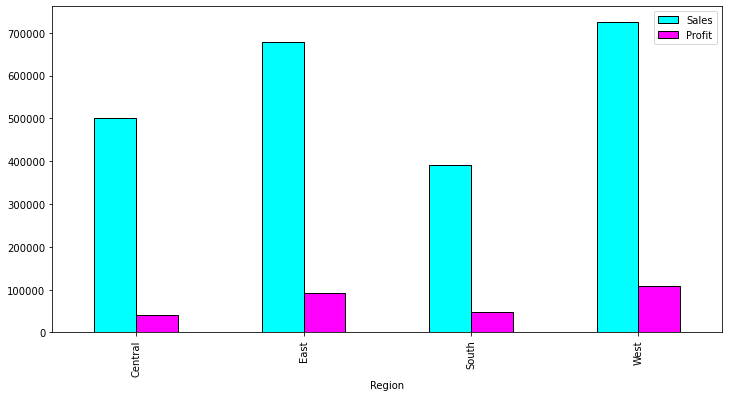

In [18]:
data.groupby('Region')[['Sales','Profit']].sum().plot.bar(figsize= (12,6),color=['cyan','magenta'],edgecolor='black')
plt.show

From the above observation we can conclude that, highest sales and profits have been made in Western region followed by eatern region as the second highest. Central region is the lowest profit generating region inspite of having thrid rank in sales.

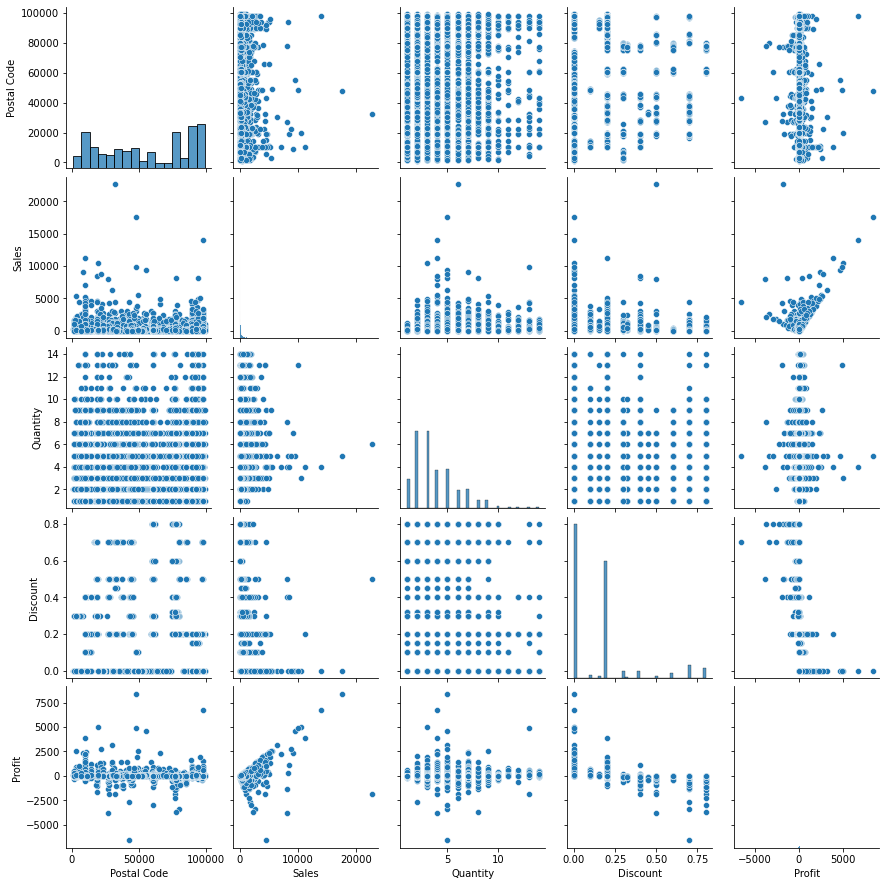

In [19]:
sns.pairplot(data)

### Impact on Sales and Profit State-wise 

<AxesSubplot:xlabel='State'>

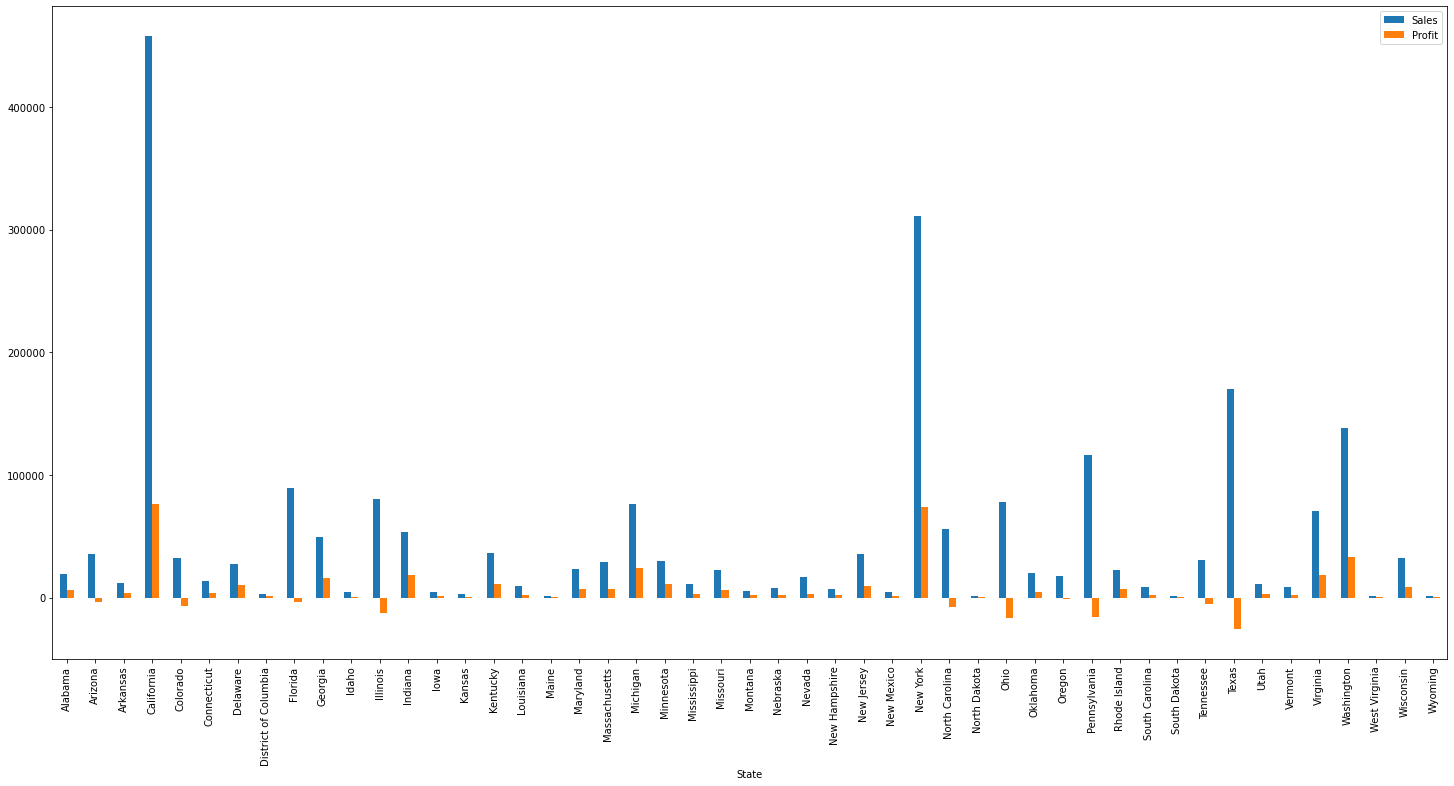

In [20]:
data.groupby('State')[['Sales','Profit']].sum().plot.bar(figsize=(25,12))

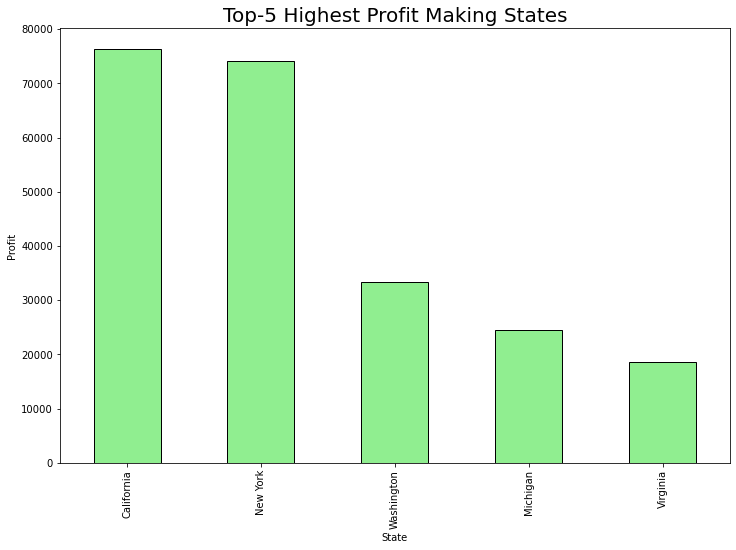

In [21]:
data.groupby(['State'])['Profit'].sum().sort_values(ascending=False).head().plot.bar(figsize =(12,8),color=['lightgreen'],edgecolor='black')
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Top-5 Highest Profit Making States",fontdict={'color':'black','fontsize':20})
plt.show()


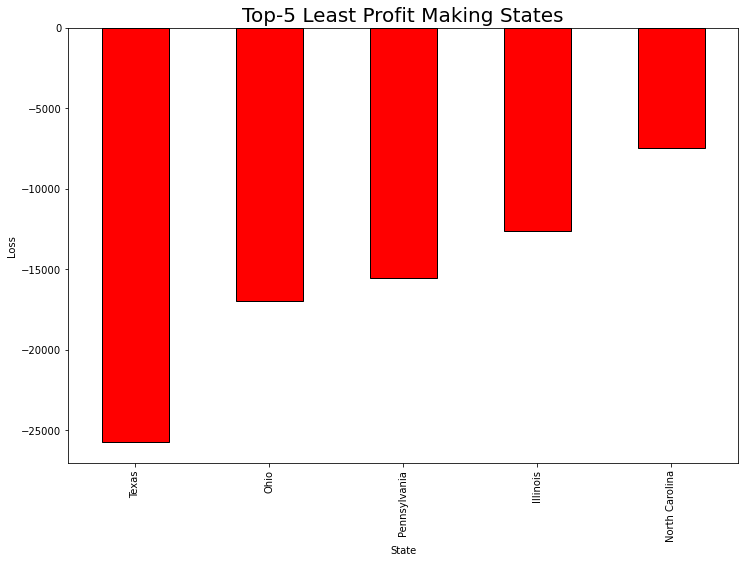

In [22]:
data.groupby(['State'])['Profit'].sum().sort_values(ascending=True).head().plot.bar(figsize =(12,8),color=['red'],edgecolor='black')
plt.xlabel("State")
plt.ylabel("Loss")
plt.title("Top-5 Least Profit Making States",fontdict={'color':'black','fontsize':20})
plt.show()

# Recommendations:


1. We can suggest that to increase the frequency of same day delivery option as it will attract more customers.

2. We should focus on the furniture category, as the sales is high but profit is low we might reduce the stock of furniture and increase the stock of technology & Office supplies. Or we might introduce more premium products to support the profit for furniture.

3. We should find out what are the reasons that are causing less profit or loss in certain states and should tackle those reasons effectively. One might be possible reason can be that the product delivery reach to certains states due to lack of trasportation.

4. Region wise we can focus on central region to improve the profit.